In [131]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime as dt
import os
import re
import ipywidgets as widgets
import importlib

from ipywidgets import interact
from functools import reduce

import sklearn.datasets as skds
import sklearn.preprocessing as prep

import statsmodels.api as sm

from packages import tools
from packages import models

# Data

In [3]:
price_paths = ["Datasets/DAMPrices.csv", "Datasets/DAMPrices2.csv"]
prices = tools.read_price_data(price_paths)

## Key Features of DAM Electricity Prices

In [4]:
mpl.rcParams["figure.figsize"] = [7.5,5]
ylims = (prices.min()[0]-prices.std()[0]*0.5, prices.max()[0]+prices.std()[0]*0.5)

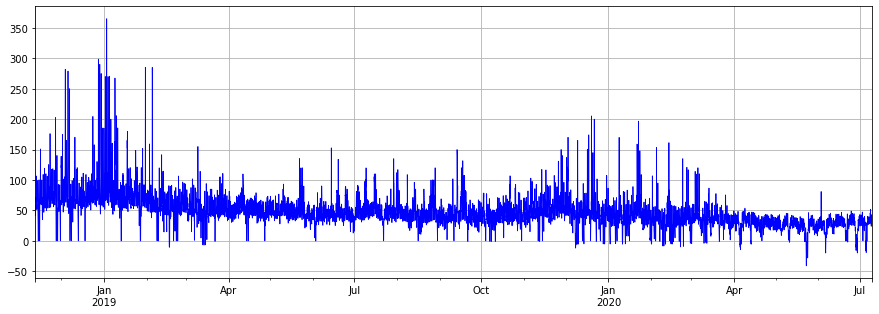

In [5]:
ax = prices.plot(color='blue',linewidth=0.8, figsize=(15,5), grid=True, legend=False)
ax.set_xlabel("")
plt.show()

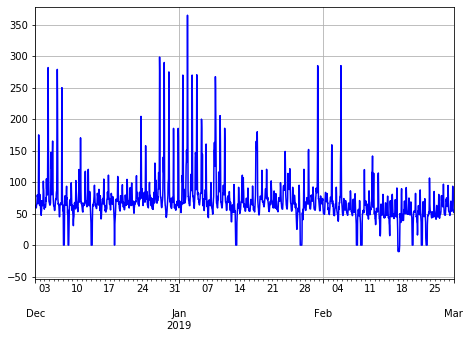

In [6]:
start = dt.datetime(2018,12,1)
end = dt.datetime(2019,3,1)
ax = prices.loc[start:end].plot(ylim=ylims, color='blue', grid=True, legend=False)
ax.set_xlabel("")
plt.show()

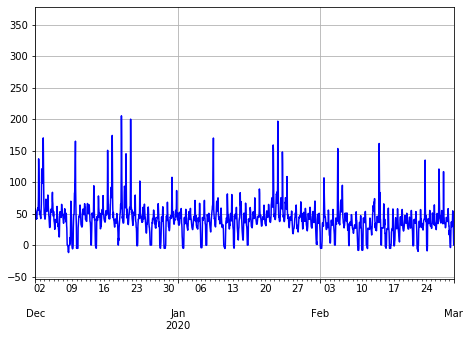

In [7]:
start = dt.datetime(2019,12,1)
end = dt.datetime(2020,3,1)
ax = prices.loc[start:end].plot(ylim=ylims, color='blue', grid=True, legend=False)
ax.set_xlabel("")
plt.show()

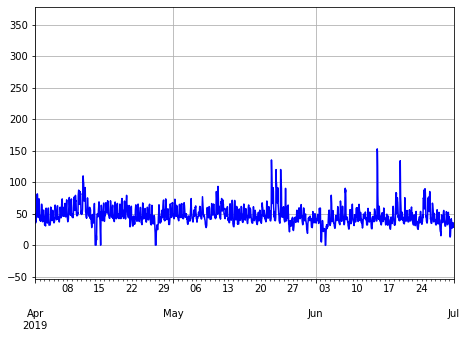

In [8]:
start = dt.datetime(2019,4,1)
end = dt.datetime(2019,7,1)
ax = prices.loc[start:end].plot(ylim=ylims, color='blue', grid=True, legend=False)
ax.set_xlabel("")
plt.show()

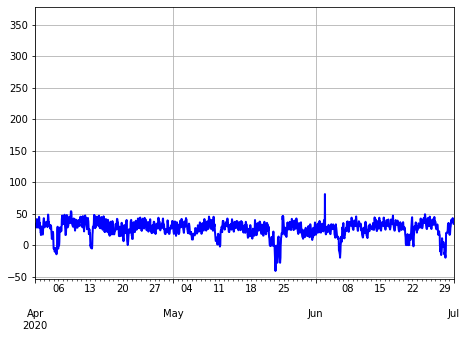

In [9]:
start = dt.datetime(2020,4,1)
end = dt.datetime(2020,7,1)
ax = prices.loc[start:end].plot(ylim=ylims, linewidth=2, color='blue', grid=True, legend=False)
ax.set_xlabel("")
plt.show()

In [68]:
test = prices.loc[prices.index.date == dt.datetime(2020,5,23).date()].copy()
test.index -= dt.timedelta(hours=1)
test

,EURPrices
DeliveryPeriod,
2020-05-22 23:00:00,-1.03
2020-05-23 00:00:00,-1.02
2020-05-23 01:00:00,-10.00
2020-05-23 02:00:00,-22.89
2020-05-23 03:00:00,-29.81
2020-05-23 04:00:00,-39.97
2020-05-23 05:00:00,-41.09
2020-05-23 06:00:00,-33.52
2020-05-23 07:00:00,-20.00


## Other Datasets

In [97]:
price_paths = ["Datasets/DAMPrices.csv", "Datasets/DAMPrices2.csv"]
bm_price_paths = ["Datasets/BMInfo1.csv", "Datasets/BMInfo2.csv", "Datasets/BMInfo3.csv"]
wind_paths = ["Datasets/WindForecast.csv", "Datasets/WindForecast2.csv"]
demand_paths = ["Datasets/DemandForecast.csv", "Datasets/DemandForecast2.csv"]

prices = tools.read_price_data(price_paths)
bm_prices = tools.read_bm_price_data(bm_price_paths)
wind_forecast = tools.read_forecast_data(wind_paths)
demand_forecast = tools.read_forecast_data(demand_paths)

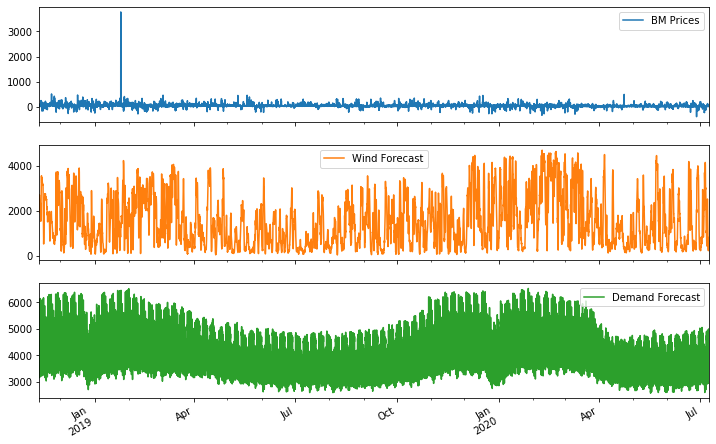

In [159]:
date_from = prices.index.date[0]
date_to = prices.index.date[-1]

prices = prices.loc[date_from:date_to]
bm_prices = bm_prices.loc[date_from:date_to]
wind_forecast = wind_forecast.loc[date_from:date_to]
demand_forecast = demand_forecast.loc[date_from:date_to]

data_values = {
    "DAM Prices": prices.values.flatten(),
    "BM Prices": bm_prices.values.flatten(),
    "Wind Forecast": wind_forecast.values.flatten(),
    "Demand Forecast": demand_forecast.values.flatten()
}
test_df = pd.DataFrame(data_values, index=prices.index)
test_df.index.name = ""
# scaler = prep.StandardScaler()
test_df.drop("DAM Prices", axis=1).plot(subplots=True, figsize=(12,8))

# test_df = pd.DataFrame(scaler.fit_transform(test_df), columns=test_df.columns, index=test_df.index)
# test_df.drop(["Wind", "Demand"], axis=1).plot(subplots=True)
# datasets = [prices, bm_prices, wind_forecast, demand_forecast]
# [dataset.isna().sum().sum() for dataset in datasets]
plt.show()

## Data Sources

In [197]:
pd.read_csv("Datasets/DAMPrices2.csv").head(2)["SourceData"][0]

'MarketResult_SEM-DA_PWR-MRC-D+1_20191231110000_20191231113243.csv'

In [168]:
pd.read_csv("Datasets/BMInfo2.csv").head(2)

,ID,DatasetName,SourceData,PublishTime,StartTime,EndTime,ImbalanceVolume,ImbalancePrice,ImbalanceCost
0,8979,PUB_30MinImbalCost,PUB_30MinImbalCost_201909022200.xml,2019-09-02 23:02:29,2019-09-02 22:00:00,2019-09-02 22:30:00,-32.237,-15.69,505.79853
1,8980,PUB_30MinImbalCost,PUB_30MinImbalCost_201909022230.xml,2019-09-02 23:34:06,2019-09-02 22:30:00,2019-09-02 23:00:00,-38.307,-25.85,990.23595


In [169]:
pd.read_csv("Datasets/WindForecast2.csv").head(2)

,ID,DatasetName,SourceData,PublishTime,StartTime,EndTime,LoadForecastROI,LoadForecastNI,AggregatedForecast
0,177711,PUB_4DayAggRollWindUnitFcst,PUB_4DayAggRollWindUnitFcst_201912310606.xml,2019-12-31 06:06:21,2020-01-01 00:00:00,2020-01-01 00:15:00,312.778,246.216,558.994
1,177715,PUB_4DayAggRollWindUnitFcst,PUB_4DayAggRollWindUnitFcst_201912310606.xml,2019-12-31 06:06:21,2020-01-01 01:00:00,2020-01-01 01:15:00,362.479,239.471,601.950


In [170]:
pd.read_csv("Datasets/DemandForecast2.csv").head(2)

,ID,DatasetName,SourceData,PublishTime,StartTime,EndTime,LoadForecastROI,LoadForecastNI,AggregatedForecast
0,86835,PUB_DailyLoadFcst,PUB_DailyLoadFcst_201912311011.xml,2019-12-31 10:11:31,2020-01-01 00:00:00,2020-01-01 00:30:00,3030,692,3722
1,86837,PUB_DailyLoadFcst,PUB_DailyLoadFcst_201912311011.xml,2019-12-31 10:11:31,2020-01-01 01:00:00,2020-01-01 01:30:00,2884,636,3520


In [171]:
pd.read_csv("Datasets/BidAskCurvve4.csv").head(2)

,ID,MarketAreaName,SourceData,DeliveryDay,TimeStepID,PurchaseVolume,PurchasePrice,SellVolume,SellPrice
0,20109,ROI-DA,BidAskCurves_ROI-DA_20200101_20191231131947.xml,2020-01-01,1,"3918.2,3918.2,3908.2,3908.2,3858.2,3858.2,3848...","-500,-100,-100,-99,-99,-75,-75,-50,-50,-49,-49...","1782,1782,1803.1,1803.1,1898.9,1898.9,1908.9,1...","-500,-499.95,-499.95,-150,-150,-50.1,-50.1,-50..."
1,20110,ROI-DA,BidAskCurves_ROI-DA_20200101_20191231131947.xml,2020-01-01,2,"4069.2,4069.2,4019.2,4019.2,4009.2,4009.2,3999...","-500,-104,-104,-100,-100,-75,-75,-54,-54,-53,-...","1722.2,1722.2,1745,1745,1837.4,1837.4,1847.4,1...","-500,-499.95,-499.95,-150,-150,-50.1,-50.1,-50..."


In [193]:
bm_prices.loc[bm_prices.index.date >= dt.datetime(2019,2,1).date()].std()

ImbalancePrice    48.596446
dtype: float64

In [194]:
prices.loc[prices.index.date >= dt.datetime(2019,2,1).date()].std()

EURPrices    20.468475
dtype: float64

In [195]:
bm_prices.max()

ImbalancePrice    3773.69
dtype: float64

# Time Series

## Stationarity

In [2]:
general_path = "Datasets/Writeup/"
births_and_deaths = pd.read_csv(general_path + "_births_and_deaths.csv")
forestry = pd.read_csv(general_path + "_forestry.csv")
imports = pd.read_csv(general_path + "_imports.csv")
jobs = pd.read_csv(general_path + "_jobs.csv")
penguin = pd.read_csv(general_path + "_penguin.csv")
sunglasses = pd.read_csv(general_path + "_sunglasses.csv")
visitors = pd.read_csv(general_path + "_visitors.csv")
sea_ice = pd.read_csv(general_path + "sea_ice.csv")

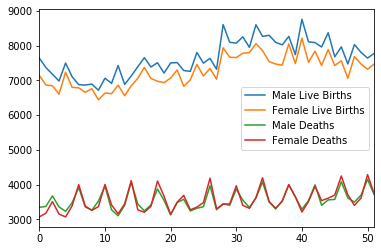

In [3]:
# STATIONARY
births_and_deaths.plot()

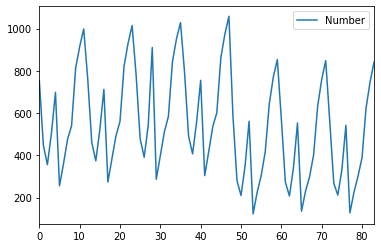

In [4]:
penguin.plot()

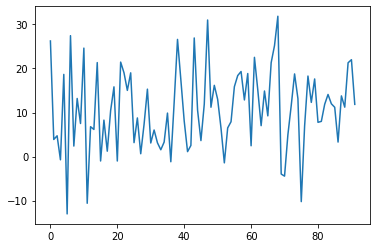

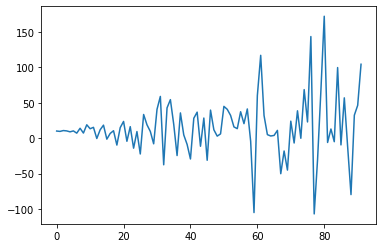

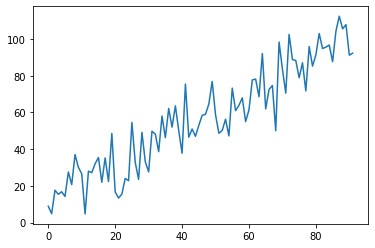

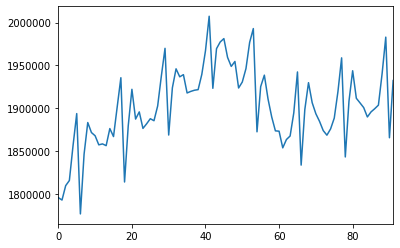

In [5]:
# Set random seed to output the same random data
np.random.seed(1)

# Time index
t = np.arange(0,92)

# Initial value
y0 = 10

# Generate time series data
stationary = np.random.normal(y0,10,len(t))
increasing_variance = np.random.normal(y0,0.8*t,len(t))
increasing_mean = np.random.normal(t+y0,10,len(t))

fig, ax = plt.subplots()
ax.plot(t, stationary)

fig, ax = plt.subplots()
ax.plot(t, increasing_variance)

fig, ax = plt.subplots()
ax.plot(t, increasing_mean)

jobs.plot(legend=False)

## Autocorrelation and Partial Autocorrelation

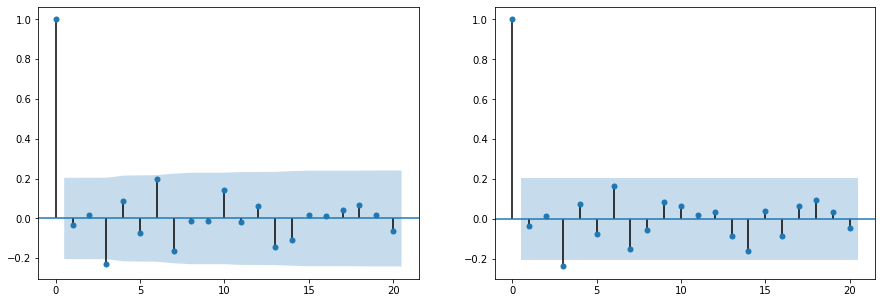

In [6]:
fig, ax1 = plt.subplots(1,2,figsize=(15,5))

# Plot ACF
sm.graphics.tsa.plot_acf(stationary, ax=ax1[0], title="")

# Plot PACF
sm.graphics.tsa.plot_pacf(stationary, ax=ax1[1], title="")

plt.show()

## Autoregressive (AR) Model

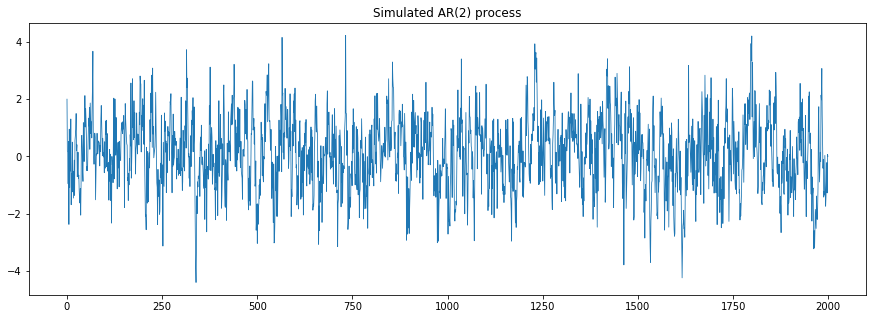

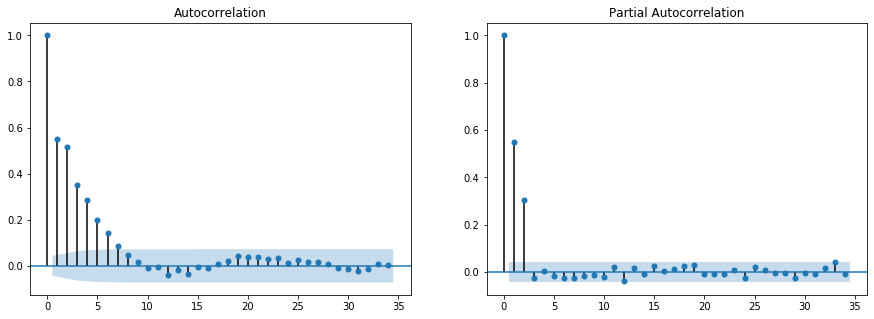

In [7]:
# Set random seed to output the same data
np.random.seed(1)

# Time index
t = np.arange(0,2000)

# Initial value of the process
y0 = 2
y = np.zeros(len(t))
y[0]=y0

# Noise of the process
eps = np.random.normal(0,1,len(t)-1)

# Parameters of the AR(2) process
th1 = 0.4
th2 = 0.3

# Simulate AR(2) process
for i in range(1,len(y)-1):
    if i==1:
        y[i] = th1*y[i-1] + eps[i]
    else:
        y[i] = th1*y[i-1] + th2*y[i-2] + eps[i]
        

fig, ax = plt.subplots(1,1,figsize=(15,5))
ax.plot(y, linewidth=0.8)
ax.set_title("Simulated AR(2) process")

fig, ax = plt.subplots(1,2,figsize=(15,5))

# Plot ACF
sm.graphics.tsa.plot_acf(y, ax=ax[0])

# Plot PACF
sm.graphics.tsa.plot_pacf(y, ax=ax[1])
plt.show()

## Moving Average (MA) Model

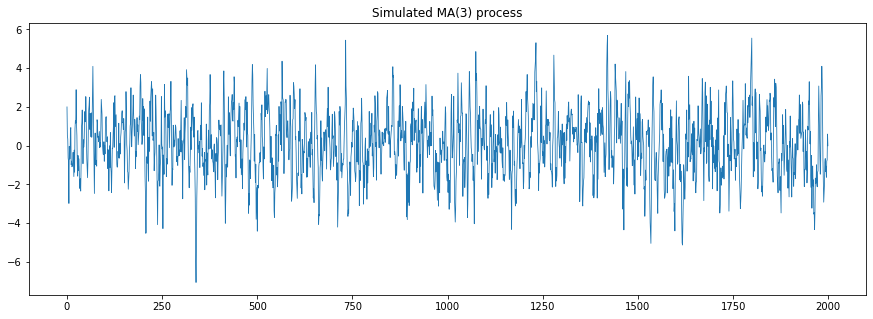

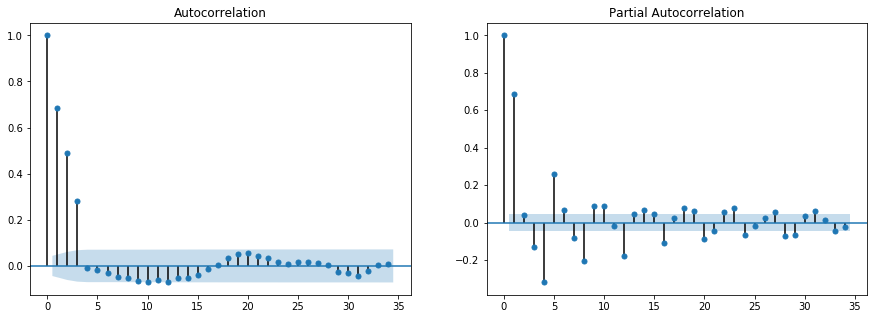

In [8]:
# Set random seed to output the same data
np.random.seed(1)

# Time index
t = np.arange(0,2000)

# Initial value of the process
y0 = 2
y = np.zeros(len(t))
y[0]=y0

# Noise of the process
eps = np.random.normal(0,1,len(t)-1)

# Parameters of the MA(3) process
b1 = 0.7
b2 = 0.8
b3 = 0.8

# Simulate MA(3) process
for i in range(1,len(y)-1):
    if i==1:
        y[i] = b1*eps[i-1] + eps[i]
    elif i==2:
        y[i] = b1*eps[i-1] + b2*eps[i-2] + eps[i]
    else:
        y[i] = b1*eps[i-1] + b2*eps[i-2] + b3*eps[i-3] + eps[i]

fig, ax = plt.subplots(1,1,figsize=(15,5))
ax.plot(y, linewidth=0.8)
ax.set_title("Simulated MA(3) process")

fig, ax = plt.subplots(1,2,figsize=(15,5))

# Plot ACF
sm.graphics.tsa.plot_acf(y, ax=ax[0])

# Plot PACF
sm.graphics.tsa.plot_pacf(y, ax=ax[1])
plt.show()

## ARMA Model

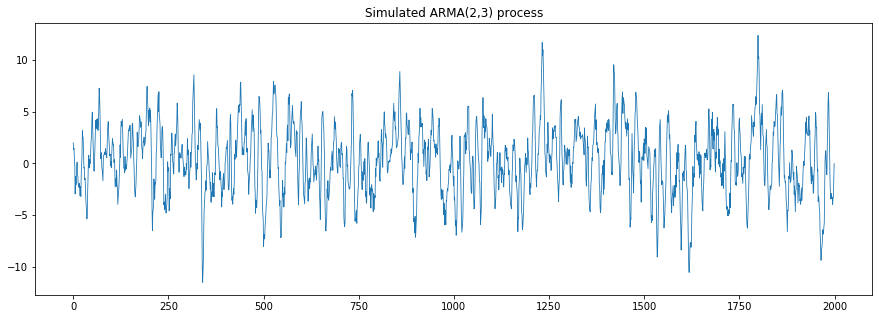

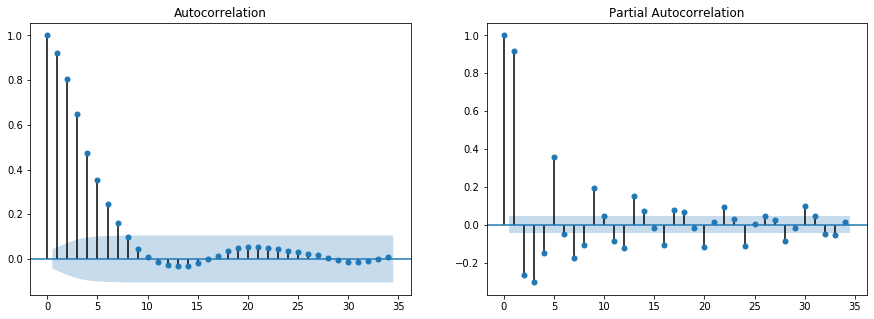

In [9]:
# Set random seed to output the same data
np.random.seed(1)

# Time index
t = np.arange(0,2000)

# Initial value of the process
y0 = 2
y = np.zeros(len(t))
y[0]=y0

# Noise of the process
eps = np.random.normal(0,1,len(t)-1)

# Parameters of the ARMA(2,3) process
b1 = 0.7
b2 = 0.8
b3 = 0.8
th1 = 0.4
th2 = 0.3

# Simulate ARMA(2,3) process
for i in range(1,len(y)-1):
    if i==1:
        y[i] = b1*eps[i-1] + th1*y[i-1] + eps[i]
    elif i==2:
        y[i] = b1*eps[i-1] + b2*eps[i-2] + th1*y[i-1] + th2*y[i-2] + eps[i]
    else:
        y[i] = b1*eps[i-1] + b2*eps[i-2] + b3*eps[i-3] + th1*y[i-1] + th2*y[i-2] + eps[i]

fig, ax = plt.subplots(1,1,figsize=(15,5))
ax.plot(y, linewidth=0.8)
ax.set_title("Simulated ARMA(2,3) process")

fig, ax = plt.subplots(1,2,figsize=(15,5))

# Plot ACF
sm.graphics.tsa.plot_acf(y, ax=ax[0])

# Plot PACF
sm.graphics.tsa.plot_pacf(y, ax=ax[1])
plt.show()

In [10]:
price_path = ["Datasets/DAMPrices.csv", "Datasets/DAMPrices2.csv"]
prices = tools.read_price_data(price_path)
may_prices = prices.loc[prices.index.month == 5]
may20_prices = may_prices.loc[may_prices.index.year == 2020]

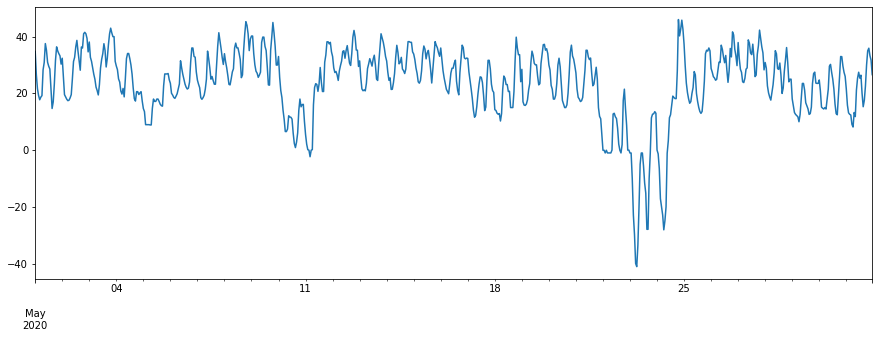

In [11]:
ax = may20_prices.plot(figsize=(15,5), legend=False)
ax.set_xlabel("")
plt.show()

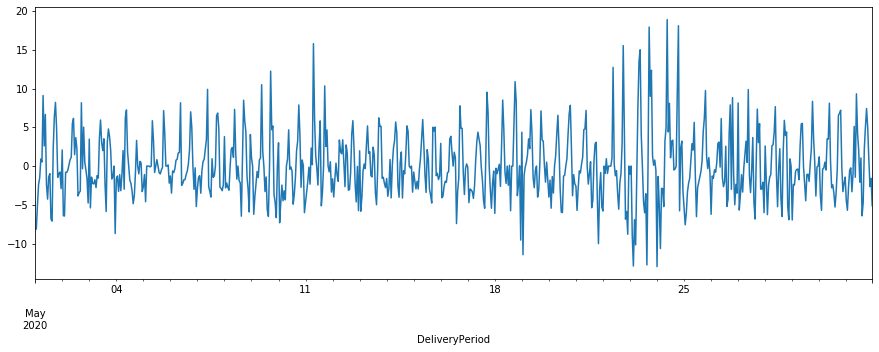

In [12]:
may20_prices.diff().plot(figsize=(15,5), legend=False)
plt.show()

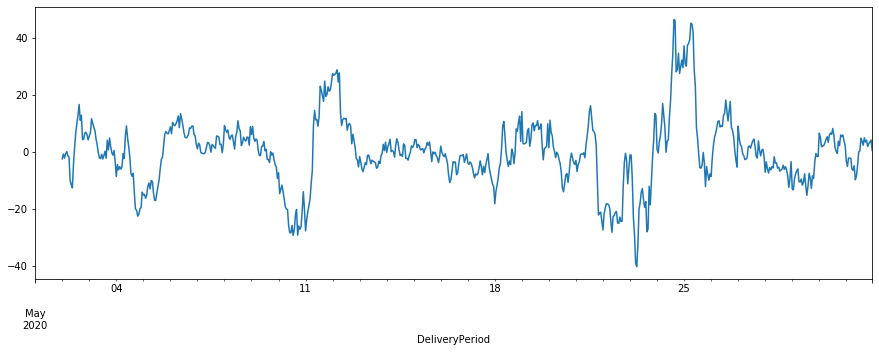

In [13]:
may20_prices.diff(periods=24).plot(figsize=(15,5), legend=False)
plt.show()

## Seasonality

<IPython.core.display.Javascript object>


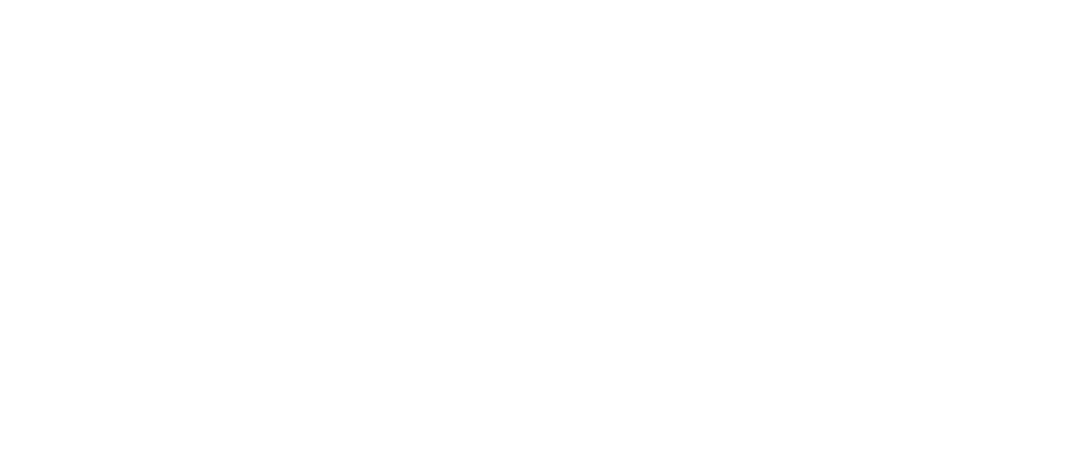

In [14]:
%matplotlib nbagg
prices.plot(figsize=(12,5))
plt.show()
# %matplotlib inline

# X-Model

## Supply and Demand

Mathematical formula for supply and demand curves:

\begin{equation}
        S_t(P) = \mathop{\sum\limits_{p \in \mathbb{P}_{S,t}}}_{p \leq P} V_{S,t}(p) \text{ for } P \in \mathbb{P}_{S,t} \text{ and }
        D_t(P) = \mathop{\sum\limits_{p \in \mathbb{P}_{D,t}}}_{p \geq P} V_{D,t}(p) \text{ for } P \in \mathbb{P}_{D,t} 
\end{equation}

In [15]:
def clean_TimeStepID(TimeStepID):
    # If no need to edit, return the same value
    if type(TimeStepID) == int:
        return(TimeStepID)
    
    # Remove letter/s
    if re.search(".*B$", TimeStepID):
        pos = re.search("B", TimeStepID).start()
    else:
        return(int(TimeStepID))
    
    # Remove letter and convert to int
    return(int(TimeStepID[:pos]))


def clean_data(dataframe):
    # Remove duplicates
    dataframe = dataframe.drop_duplicates()
    
    # Ensure data types are consistent, i.e. DeliveryDay is date, TimeStepID is int, etc.
    dataframe.loc[:,"DeliveryDay"] = pd.to_datetime(dataframe["DeliveryDay"], format="%Y-%m-%d")   
    dataframe.loc[:,"TimeStepID"] = dataframe["TimeStepID"].apply(clean_TimeStepID)
    dataframe = dataframe.sort_values(by=["DeliveryDay","TimeStepID"]).reset_index(drop=True)
    
    # Convert TimeStepID to zero-index, i.e. {0,...,23}
    dataframe["TimeStepID"] = dataframe["TimeStepID"] - 1
    
    # Combine DeliveryDay and TimeStepID into one date column, "DeliveryPeriod", and set as index
    dataframe["DeliveryPeriod"] = [day + dt.timedelta(hours=hour) for (day, hour) in zip(dataframe["DeliveryDay"], dataframe["TimeStepID"])]
    dataframe.set_index("DeliveryPeriod", inplace=True)
    
    # Remove redundant columns
    dataframe.drop(["DeliveryDay", "TimeStepID"], axis=1, inplace=True)
    
    return(dataframe)

In [16]:
ba_paths = ["Datasets/BidAskCurvve1.csv", "Datasets/BidAskCurvve2.csv", "Datasets/BidAskCurvve3.csv", "Datasets/BidAskCurvve4.csv"]
cols = ["DeliveryDay", "TimeStepID", "PurchaseVolume", "PurchasePrice", "SellVolume", "SellPrice"]

ba = [pd.read_csv(ba_paths[i], usecols=cols) for i in range(len(ba_paths))]
ba = reduce(lambda df1, df2: df1.append(df2), ba)

ba = clean_data(ba)

C:\Users\nvolf\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value
C:\Users\nvolf\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [17]:
def get_price_curves(dataframe, index, return_vals="both", aggregated=False, plot=False, xlim=None, ylim=None, legend=True, figsize=mpl.rcParams["figure.figsize"]):
    # Extract bid volumes and corresponding bid prices for that delivery hour
    pv = list(map(float,dataframe.loc[:,"PurchaseVolume"][index].split(",")))
    sv = list(map(float,dataframe.loc[:,"SellVolume"][index].split(",")))
    pp = list(map(float, dataframe.loc[:,"PurchasePrice"][index].split(",")))
    sp = list(map(float,dataframe.loc[:,"SellPrice"][index].split(",")))
    
    # Combine bid data and supply data into their own dataframes, and add a column of aggregated volume to each df.
    if return_vals == "purchase":
        purchase = pd.DataFrame(dict(PurchaseVolume=pv, PurchasePrice=pp)).sort_values(by="PurchasePrice", ascending=False)
        if aggregated:
            purchase["AggregatedPurchaseVolume"] = purchase[["PurchaseVolume"]].cumsum()
        
    elif return_vals == "sell":
        sell = pd.DataFrame(dict(SellVolume=sv, SellPrice=sp)).sort_values(by="SellPrice")
        if aggregated:
            sell["AggregatedSellVolume"] = sell[["SellVolume"]].cumsum()
        
    elif return_vals == "both":
        purchase = pd.DataFrame(dict(PurchaseVolume=pv, PurchasePrice=pp)).sort_values(by="PurchasePrice", ascending=False)
        sell = pd.DataFrame(dict(SellVolume=sv, SellPrice=sp)).sort_values(by="SellPrice")
        
        if aggregated:
            purchase["AggregatedPurchaseVolume"] = purchase[["PurchaseVolume"]].cumsum()
            sell["AggregatedSellVolume"] = sell[["SellVolume"]].cumsum()
    
    # For illustration
    if plot and aggregated:
        xlim = (purchase["AggregatedPurchaseVolume"].min(),
                purchase["AggregatedPurchaseVolume"].max()) if xlim==None else xlim
        ylim = (-100, 300) if ylim==None else ylim
        ax = purchase.drop(["PurchaseVolume"], axis=1).plot(x="AggregatedPurchaseVolume", legend=legend, figsize=figsize)
        sell.drop(["SellVolume"], axis=1).plot(x="AggregatedSellVolume", ax=ax, legend=legend)
        ax.set_xlabel("Volume")
        ax.set_ylabel("Price")
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
    
    if plot and not aggregated:
        print("Warning: cannot plot if aggregated=False")
           
    # Return the purchase/sell curve data
    if return_vals == "purchase":
        return(purchase) 
    elif return_vals == "sell":
        return(sell)
    elif return_vals == "both":
        return(purchase, sell)

In [18]:
ba.head()

,PurchaseVolume,PurchasePrice,SellVolume,SellPrice
DeliveryPeriod,,,,
2018-11-13 00:00:00,"4033.7,4033.7,3883.7,3883.7,3683.7,3683.7,3583...","-500,-401,-401,-351,-351,-299,-299,-80,-80,-60...","1792.5,1792.5,1868.6,1868.6,2301.1,2301.1,2334...","-500,-499.95,-499.95,-150,-150,-20,-20,-5.27,-..."
2018-11-13 01:00:00,"3938,3938,3788,3788,3588,3588,3488,3488,3483,3...","-500,-401,-401,-351,-351,-299,-299,-80,-80,-60...","1728.5,1728.5,1804.7,1804.7,2216.1,2216.1,2249...","-500,-499.95,-499.95,-150,-150,-20,-20,-5.27,-..."
2018-11-13 02:00:00,"3761.4,3761.4,3611.4,3611.4,3411.4,3411.4,3311...","-500,-401,-401,-351,-351,-299,-299,-80,-80,-60...","1572.6,1572.6,1647.1,1647.1,2043.9,2043.9,2077...","-500,-499.95,-499.95,-150,-150,-20,-20,-5.27,-..."
2018-11-13 03:00:00,"3376.6,3376.6,3226.6,3226.6,3026.6,3026.6,2926...","-500,-401,-401,-351,-351,-299,-299,-80,-80,-60...","1214.4,1214.4,1284.3,1284.3,1665.7,1665.7,1699...","-500,-499.95,-499.95,-150,-150,-20,-20,-5.27,-..."
2018-11-13 04:00:00,"3266,3266,3116,3116,2916,2916,2816,2816,2811,2...","-500,-401,-401,-351,-351,-299,-299,-80,-80,-60...","1177.8,1177.8,1241,1241,1603.1,1603.1,1636.8,1...","-500,-499.95,-499.95,-150,-150,-20,-20,-5.27,-..."


In [19]:
mpl.use("nbagg")

<IPython.core.display.Javascript object>


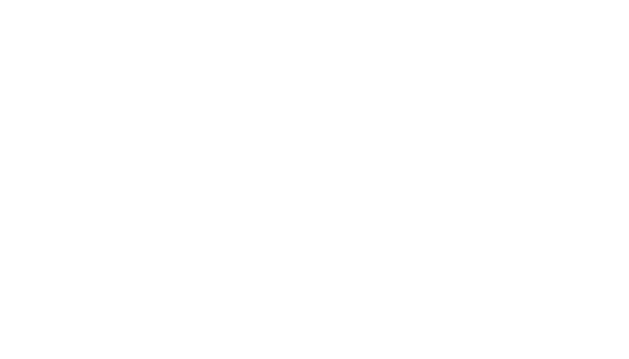

In [20]:
%matplotlib nbagg
bid_curve, ask_curve = get_price_curves(ba, 0, plot=True, aggregated=True, legend=False, figsize=[7,4])
plt.show()

<IPython.core.display.Javascript object>


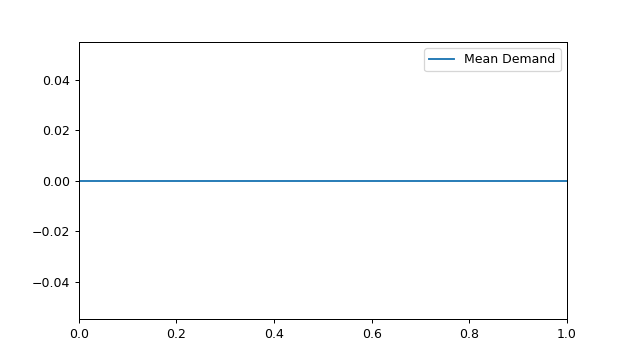

In [25]:
%matplotlib nbagg
pd.DataFrame({"Mean Demand":np.zeros(2)}).plot(figsize=[7,4])
plt.show()

<IPython.core.display.Javascript object>


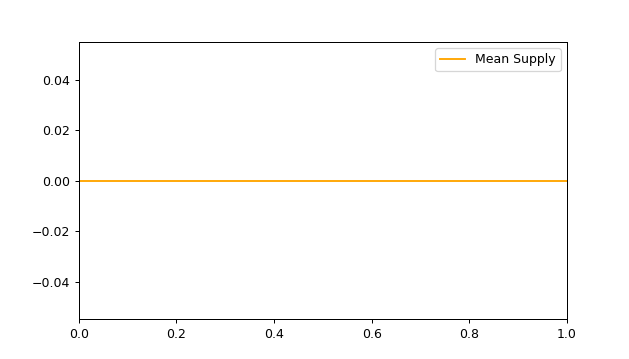

In [26]:
%matplotlib nbagg
pd.DataFrame({"Mean Supply":np.zeros(2)}).plot(figsize=[7,4], color="orange")
plt.show()

## Price classes for bids

# of purchase curve price classes: 16
# of sale curve price classes: 23


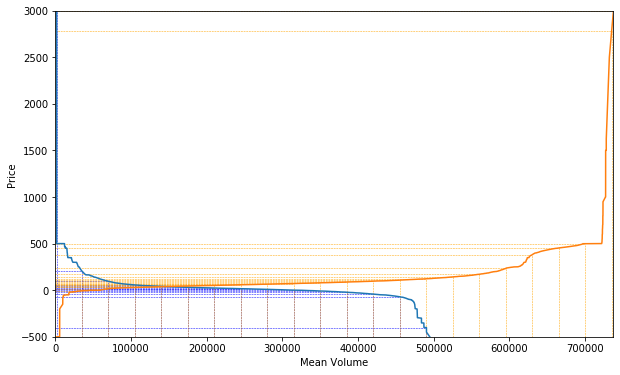

In [447]:
mean_purchase = pd.read_csv("Variables/mean_purchase.csv", index_col="PurchasePrice")
mean_sell = pd.read_csv("Variables/mean_sell.csv", index_col="SellPrice")

def to_price_curve(bid_dataframe, curve_type):
    # Sort dataframe by prices (increasing order for supply curve, decreasing order for demand curve)
    if curve_type == "sell":
        sorted_bid_dataframe = bid_dataframe.sort_values(by=["SellPrice"], ascending=True)
    elif curve_type == "purchase":
        sorted_bid_dataframe = bid_dataframe.sort_values(by=["PurchasePrice"], ascending=False)

    # Calculate cumulative volumes
    column_name = "PurchaseVolume" if curve_type == "purchase" else "SellVolume"
    agg_column_name = "AggregatedPurchaseVolume" if curve_type == "purchase" else "AggregatedSellVolume"
    
    sorted_bid_dataframe[agg_column_name] = sorted_bid_dataframe[column_name].cumsum()
    
    return(sorted_bid_dataframe)

mean_purchase_curve = to_price_curve(mean_purchase, curve_type="purchase")
mean_sell_curve = to_price_curve(mean_sell, curve_type="sell")

def plot_price_curves(purchase, sell, xlim=None, ylim=None, classes=None, linewidth=0.8, figsize=mpl.rcParams["figure.figsize"], legend=True):
    xlim = (0, max(purchase[["AggregatedPurchaseVolume"]].max()[0],
                  sell[["AggregatedSellVolume"]].max()[0])) if xlim == None else xlim
    ylim = (-500,3000) if ylim == None else ylim
    
    ax = purchase.drop(["PurchaseVolume"], axis=1).reset_index().plot(y=["PurchasePrice"], x="AggregatedPurchaseVolume", figsize=figsize, legend=legend)
    sell.drop(["SellVolume"], axis=1).reset_index().plot(y=["SellPrice"], x="AggregatedSellVolume", ax=ax, xlim=xlim, ylim=ylim, legend=legend)
    ax.set_ylabel("Price"); ax.set_xlabel("Mean Volume")
    
    if classes is not None:
        purchase_classes, sell_classes = classes
        
        for points in purchase_classes.values:
            volume = points[0]
            price = points[1]
            
            ax.hlines(price, xmin=0, xmax=volume, color="blue", linestyle="--", linewidth=linewidth)
            ax.vlines(volume, ymin=-500, ymax=price, color="blue", linestyle="--", linewidth=linewidth)
            
        for points in sell_classes.values:
            volume = points[0]
            price = points[1]
            
            ax.hlines(price, xmin=0, xmax=volume, color="orange", linestyle="--", linewidth=linewidth)
            ax.vlines(volume, ymin=-500, ymax=price, color="orange", linestyle="--", linewidth=linewidth)    
    
    plt.show()
    
""" Each purchase (demand) curve price class is determined by its lower bound, and
    each sell (supply) curve price class is determined by its upper bound.
    
    The class_length parameter can be chosen arbitrarily or with some justification. Our choice of 31000 is to so
    that we have a similar number of classes as in the paper (which had 16 purchase/sell classes).
"""
def create_price_classes(mean_purchase_curve, mean_sell_curve, class_length=35000, decimals=2):
    # Initialise and prepare price class dataframes.
    purchase_df = mean_purchase_curve.drop("PurchaseVolume", axis=1)
    sell_df = mean_sell_curve.drop("SellVolume", axis=1)

    purchase_classes = pd.DataFrame(columns=["Volume", "Price"])
    sell_classes = pd.DataFrame(columns=["Volume","Price"])
    
    purchase_classes = purchase_classes.append(dict(Volume=purchase_df.iloc[0,0], Price=purchase_df.index[0]), ignore_index=True)
    sell_classes = sell_classes.append(dict(Volume=sell_df.iloc[0,0], Price=sell_df.index[0]), ignore_index=True)
    
    
    # Populate demand price class dataframe
    volume_class_increment = 1
    for i in range(1, purchase_df.shape[0]):
        new_volume_class_bound = volume_class_increment * class_length
        
        if new_volume_class_bound == purchase_df.iloc[i, 0]:
            purchase_classes = purchase_classes.append(dict(Volume=new_volume_class_bound, Price=purchase_df.index[i]))
        
        elif new_volume_class_bound < purchase_df.iloc[i, 0]:
            previous_price = purchase_df.index[i-1]
            current_price = purchase_df.index[i]
            previous_volume = purchase_df.iloc[i-1, 0]
            current_volume = purchase_df.iloc[i, 0]
            
            # Linear interpolation between current price and previous price
            price_diff = current_price - previous_price
            volume_diff = current_volume - previous_volume
            new_price_class_bound = previous_price + (price_diff/volume_diff)*(new_volume_class_bound-previous_volume)
            purchase_classes = purchase_classes.append(dict(Volume=new_volume_class_bound, Price=round(new_price_class_bound, decimals)), ignore_index=True)
        else:
            continue
            
        volume_class_increment += 1
    
    
    # Populate supply price class dataframe
    volume_class_increment = 1
    for i in range(1, sell_df.shape[0]):
        new_volume_class_bound = volume_class_increment * class_length
        
        if new_volume_class_bound == sell_df.iloc[i, 0]:
            sell_classes = sell_classes.append(dict(Volume=new_volume_class_bound, Price=sell_df.index[i]), ignore_index=True)
        
        elif new_volume_class_bound < sell_df.iloc[i, 0]:
            previous_price = sell_df.index[i-1]
            current_price = sell_df.index[i]
            previous_volume = sell_df.iloc[i-1, 0]
            current_volume = sell_df.iloc[i, 0]
            
            # Linear interpolation between current price and previous price
            price_diff = current_price - previous_price
            volume_diff = current_volume - previous_volume
            new_price_class_bound = previous_price + (price_diff/volume_diff)*(new_volume_class_bound-previous_volume)
            sell_classes = sell_classes.append(dict(Volume=new_volume_class_bound, Price=round(new_price_class_bound, decimals)), ignore_index=True)
        else:
            continue
            
        volume_class_increment += 1
    
    purchase_classes = purchase_classes.append(dict(Volume=purchase_df.iloc[purchase_df.shape[0]-1,0], Price=round(purchase_df.index[-1], decimals)), ignore_index=True)
    sell_classes = sell_classes.append(dict(Volume=sell_df.iloc[sell_df.shape[0]-1,0], Price=round(sell_df.index[-1], decimals)), ignore_index=True)
    
    return(purchase_classes, sell_classes)

purchase_classes, sell_classes = create_price_classes(mean_purchase_curve, mean_sell_curve)

print("# of purchase curve price classes:", len(purchase_classes))
print("# of sale curve price classes:", len(sell_classes))

%matplotlib inline
plot_price_curves(mean_purchase_curve, mean_sell_curve, classes=(purchase_classes, sell_classes), linewidth=0.5, figsize=[10,6], legend=False)

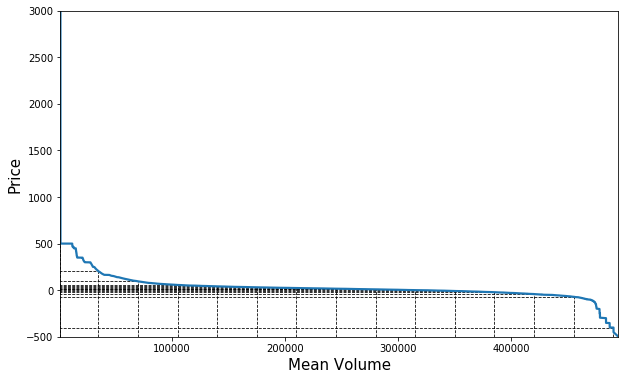

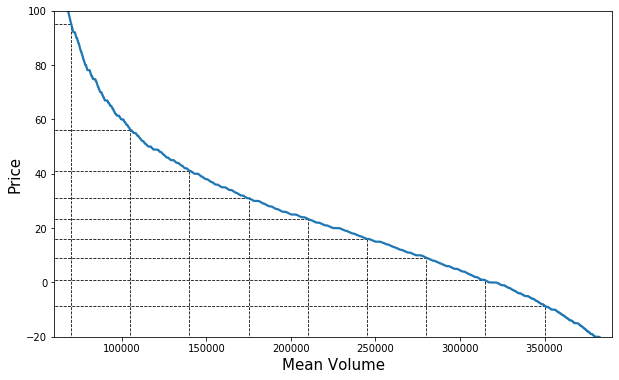

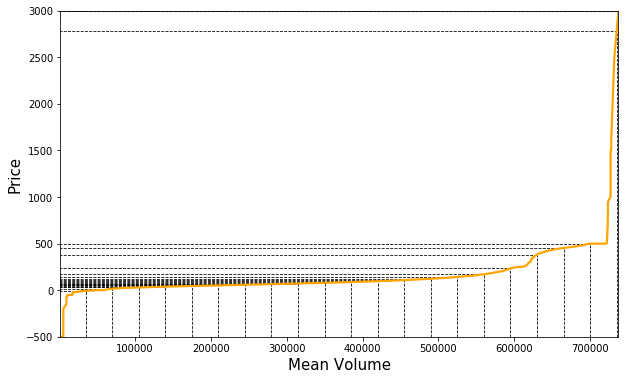

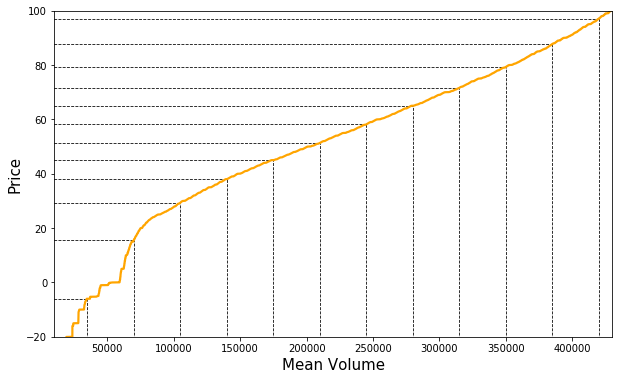

In [449]:
def plot_purchase_curve(purchase, xlim=None, ylim=None, classes=None, linewidth=0.8, figsize=mpl.rcParams["figure.figsize"], legend=True):
#     xlim = (0, max(purchase[["AggregatedPurchaseVolume"]].max()[0],
#                   sell[["AggregatedSellVolume"]].max()[0])) if xlim == None else xlim
    ylim = (-500,3000) if ylim == None else ylim
    
    ax = purchase.drop(["PurchaseVolume"], axis=1).reset_index().plot(y=["PurchasePrice"], x="AggregatedPurchaseVolume", figsize=figsize, legend=legend, linewidth=2.2, ylim=ylim, xlim=xlim)
#     sell.drop(["SellVolume"], axis=1).reset_index().plot(y=["SellPrice"], x="AggregatedSellVolume", ax=ax, xlim=xlim, ylim=ylim, legend=legend)
    ax.set_ylabel("Price", fontsize=15); ax.set_xlabel("Mean Volume", fontsize=15)
    
    if classes is not None:
        purchase_classes, sell_classes = classes
        
        for points in purchase_classes.values:
            volume = points[0]
            price = points[1]
            
            ax.hlines(price, xmin=0, xmax=volume, linestyle="--", linewidth=linewidth)
            ax.vlines(volume, ymin=-500, ymax=price, linestyle="--", linewidth=linewidth)
            
#         for points in sell_classes.values:
#             volume = points[0]
#             price = points[1]
            
#             ax.hlines(price, xmin=0, xmax=volume, color="orange", linestyle="--", linewidth=linewidth)
#             ax.vlines(volume, ymin=-500, ymax=price, color="orange", linestyle="--", linewidth=linewidth)    
    
    plt.show()
    
def plot_sell_curve(sell, xlim=None, ylim=None, classes=None, linewidth=0.8, figsize=mpl.rcParams["figure.figsize"], legend=True):
#     xlim = (0, max(purchase[["AggregatedPurchaseVolume"]].max()[0],
#                   sell[["AggregatedSellVolume"]].max()[0])) if xlim == None else xlim
    ylim = (-500,3000) if ylim == None else ylim
    
    ax = sell.drop(["SellVolume"], axis=1).reset_index().plot(y=["SellPrice"], x="AggregatedSellVolume", figsize=figsize, legend=legend, color="orange", linewidth=2.2, ylim=ylim, xlim=xlim)
#     sell.drop(["SellVolume"], axis=1).reset_index().plot(y=["SellPrice"], x="AggregatedSellVolume", ax=ax, xlim=xlim, ylim=ylim, legend=legend)
    ax.set_ylabel("Price", fontsize=15); ax.set_xlabel("Mean Volume", fontsize=15)
    
    if classes is not None:
        purchase_classes, sell_classes = classes
        
#         for points in purchase_classes.values:
#             volume = points[0]
#             price = points[1]
            
#             ax.hlines(price, xmin=0, xmax=volume, color="blue", linestyle="--", linewidth=linewidth)
#             ax.vlines(volume, ymin=-500, ymax=price, color="blue", linestyle="--", linewidth=linewidth)
            
        for points in sell_classes.values:
            volume = points[0]
            price = points[1]
            
            ax.hlines(price, xmin=0, xmax=volume, linestyle="--", linewidth=linewidth)
            ax.vlines(volume, ymin=-500, ymax=price, linestyle="--", linewidth=linewidth)    
    
    plt.show()

%matplotlib inline
ylims = (-20,100)
plot_purchase_curve(mean_purchase_curve, classes=(purchase_classes, sell_classes), linewidth=0.8, figsize=[10,6], legend=False) 
plot_purchase_curve(mean_purchase_curve, classes=(purchase_classes, sell_classes), linewidth=0.8, figsize=[10,6], legend=False, ylim=ylims, xlim=(60000,390000)) 
plot_sell_curve(mean_sell_curve, classes=(purchase_classes, sell_classes), linewidth=0.8, figsize=[10,6], legend=False) 
plot_sell_curve(mean_sell_curve, classes=(purchase_classes, sell_classes), linewidth=0.8, figsize=[10,6], legend=False, ylim=ylims, xlim=(10000,430000))

# Neural Networks

## Activation Function

In [84]:
def sigmoid(x):
    return(1 / (1 + np.exp(-x)))
def relu(x):
    return(np.array([max(val, 0.02) for val in x]))

In [90]:
x = np.arange(-10,10,0.05)

# Generate activation function values
y_sigmoid = sigmoid(x)
y_tanh = np.tanh(x)
y_relu = relu(x)
y_linear = 0.75*x + 1

### Sigmoid

<IPython.core.display.Javascript object>


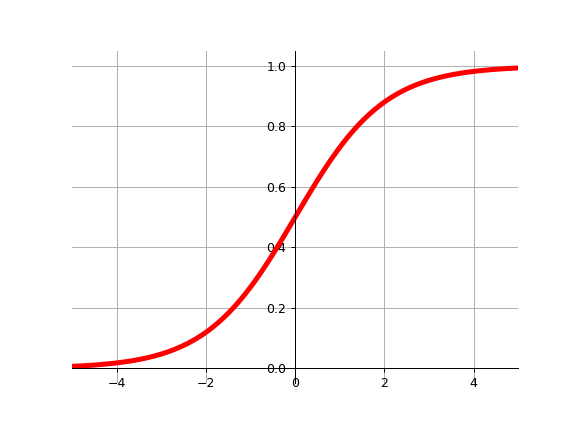

In [97]:
fig, ax = plt.subplots()

ax.plot(x,y_sigmoid,linewidth=4,color='red')
ax.set_xlim((-5,5))
ax.grid()

# set the x-spine (see below for more info on `set_position`)
ax.spines['left'].set_position('zero')

# turn off the right spine/ticks
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()

# set the y-spine
ax.spines['bottom'].set_position('zero')

# turn off the top spine/ticks
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()

### Hyperbolic Tangent (tanh)

<IPython.core.display.Javascript object>


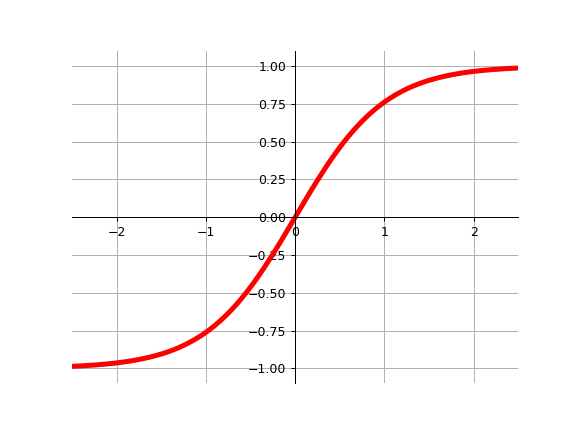

In [98]:
fig, ax = plt.subplots()

ax.plot(x,y_tanh,linewidth=4,color='red')
limit = 2.5
ax.set_xlim((-limit,limit))
ax.grid()

# set the x-spine (see below for more info on `set_position`)
ax.spines['left'].set_position('zero')

# turn off the right spine/ticks
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()

# set the y-spine
ax.spines['bottom'].set_position('zero')

# turn off the top spine/ticks
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()

### Rectified Linear Unit (ReLU)

<IPython.core.display.Javascript object>


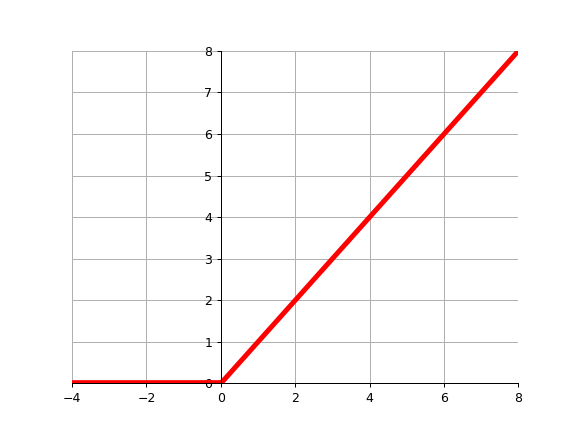

In [99]:
fig, ax = plt.subplots()

ax.plot(x,y_relu,linewidth=4,color='red')
limit = 8
ax.set_xlim((-0.5*limit,limit))
ax.set_ylim((0,limit))
ax.grid()

# set the x-spine (see below for more info on `set_position`)
ax.spines['left'].set_position('zero')

# turn off the right spine/ticks
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()

# set the y-spine
ax.spines['bottom'].set_position('zero')

# turn off the top spine/ticks
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()

### Linear Activation Function

<IPython.core.display.Javascript object>


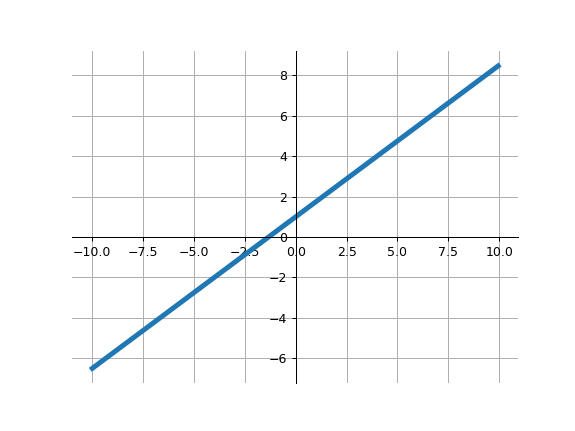

In [93]:
fig, ax = plt.subplots()

ax.plot(x,y_linear,linewidth=4)
limit = 8
# ax.set_xlim((-0.5*limit,limit))
# ax.set_ylim((0,limit))
ax.grid()

# set the x-spine (see below for more info on `set_position`)
ax.spines['left'].set_position('zero')

# turn off the right spine/ticks
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()

# set the y-spine
ax.spines['bottom'].set_position('zero')

# turn off the top spine/ticks
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()